In [38]:
##car price prediction

In [70]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [40]:
car=pd.read_csv("/content/drive/MyDrive/car data.csv")

In [41]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [42]:
car.shape        ### checking number of rows and columns

(301, 9)

In [43]:
### checking the null values
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [44]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [45]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [46]:
car.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


In [47]:
### seprating our categorical data
a=["Fuel_Type","Seller_Type","Transmission","Owner"]

In [48]:
for i in a:
  print(car[i].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [49]:
#### we are just finalizing our dataset
### creating one column where i am adding a current year as 2021
car["new_year"]=2021

In [50]:
car.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,new_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021


In [51]:
### now subtracting the year of purchased of car from new year to find out the no of years of car
car["car_old"]=car["new_year"]-car["Year"]

In [52]:
car.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,new_year,car_old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8


In [53]:
car.shape

(301, 11)

In [54]:
#### now we can drop car_ name, new_year
del car["Car_Name"]
del car["new_year"]         #### we can aslo use  car= car.drop["new_year","Car_Name",axis=1]

In [55]:
car.shape

(301, 9)

In [56]:
## we can aslo drop year
del car["Year"]

In [57]:
### now checking the shape of the car
car.shape

(301, 8)

In [58]:
###  converting categorical data into one hot encoding
car=pd.get_dummies(car,drop_first=True)

In [59]:
car.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,car_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1


In [60]:
car.shape

(301, 9)

In [62]:
car[car["Owner"]==3]

,Selling_Price,Present_Price,Kms_Driven,Owner,car_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
85,2.5,23.73,142000,3,15,0,1,1,0


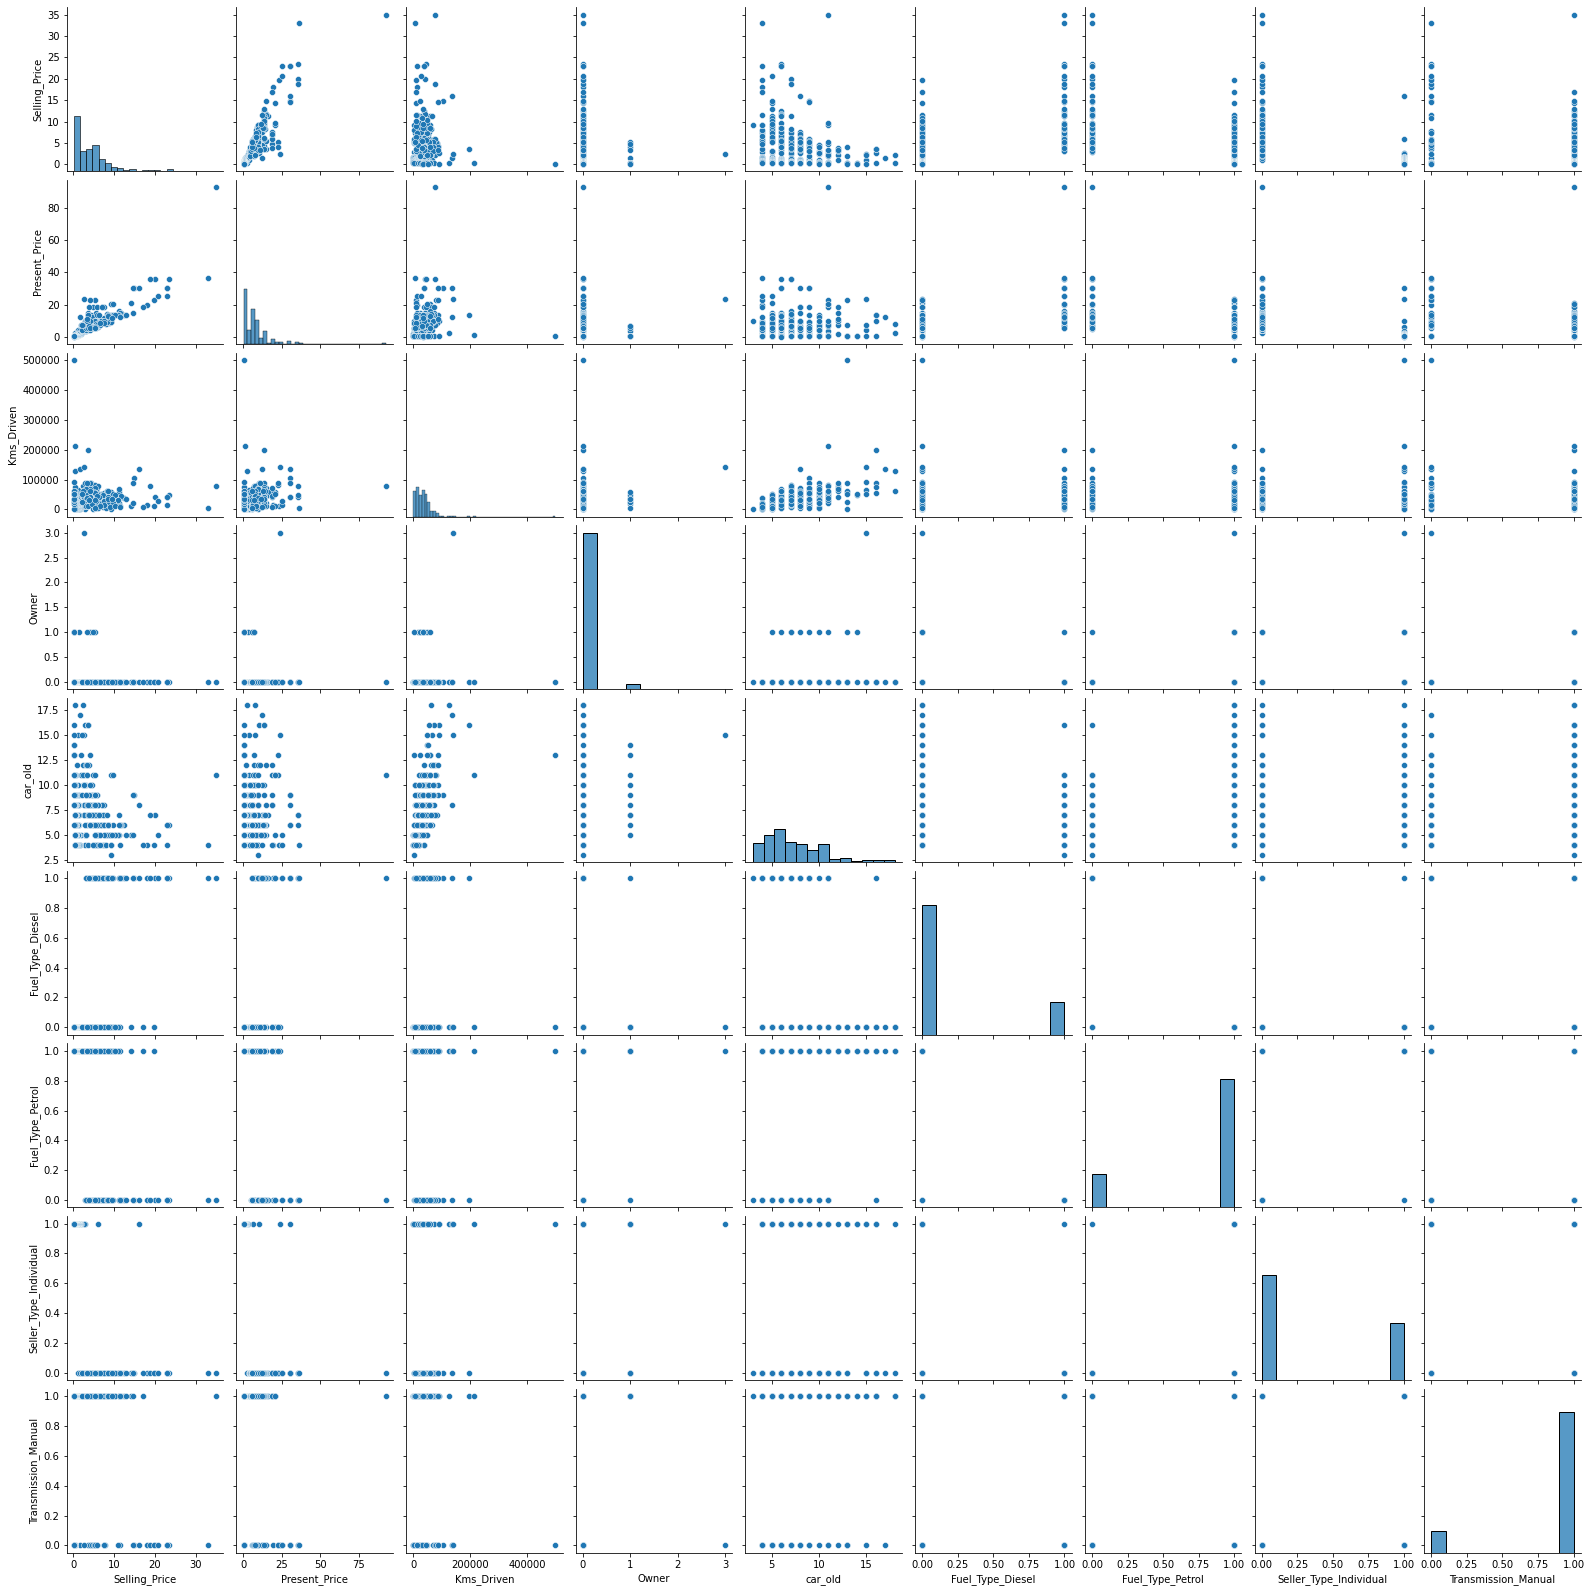

In [63]:
#### to check the visualisation
sns.pairplot(car)

In [64]:
car.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,car_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1


In [72]:
####  now separating our dependent and independent features
X=car.iloc[:,1:].values
y=car["Selling_Price"].values

In [73]:
X.shape,y.shape

((301, 8), (301,))

In [110]:
#### now its time for train and test splitting of our dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
from sklearn.ensemble import RandomForestRegressor                   ##### in random forest scaling and outlier is not mandatory 
reg=RandomForestRegressor()

In [112]:
reg.fit(X_train,y_train)           ####3 fitting our model in random forest regressor

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [113]:
###predicting the price of X_test

y_pred=reg.predict(X_test)

In [114]:
y_pred

array([ 0.4364, 10.666 ,  5.0445,  0.2143,  7.4591,  6.105 ,  1.086 ,
        0.5985,  0.4648,  6.7005,  7.7679,  1.0962,  8.1187,  0.4536,
        5.3615,  2.678 ,  1.1565, 14.1593,  0.4685,  1.5575,  0.3637,
        8.1642,  4.707 ,  2.7505,  0.5067,  3.557 ,  5.2295,  3.1405,
        1.2386,  1.1661,  0.4252, 10.0485,  0.45  ,  2.5435,  7.7559,
        4.2395,  6.0929,  6.268 ,  2.6655,  6.3558,  4.1478,  3.4277,
        4.8425,  0.5696,  5.9855,  0.7357,  8.2905,  6.421 ,  2.8845,
        3.6785,  4.898 ,  1.487 , 21.8641, 20.5364,  6.305 , 10.2825,
        5.037 ,  8.7691,  2.6245,  6.6834,  0.2498])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


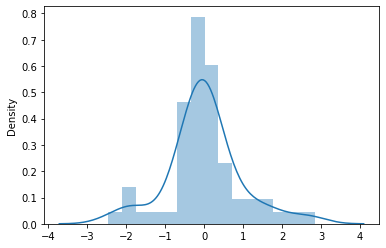

In [115]:
###### checking the distributios between y_test and y_pred
sns.distplot(y_test-y_pred)

In [116]:
#### now checking the accuracy :::: in regression accuracy is checked in mae,mse,rmse, r2
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [117]:
r2_score(y_test,y_pred)               ###### by varying test size and random state this accuracy will vary

0.9613390462089606

In [118]:
mean_absolute_error(y_test, y_pred)

0.624513114754099

In [119]:
mean_squared_error(y_test,y_pred)

0.8905776686885247

In [120]:
##### now its time to do some hyper paramater tuning to increase the efficiency

In [121]:
from sklearn.model_selection import RandomizedSearchCV

In [126]:
random={
    "n_estimators":[int(x) for x in np.linspace(start=90,stop=1300,num=12)],
    "max_depth":[int(x) for x in np.linspace(5,30,num=16)],
    "max_features":["auto","sqrt"],
    "min_samples_leaf":[1,4,6,8],

}

In [129]:
hyper_random= RandomizedSearchCV(estimator=reg,param_distributions=random,scoring="neg_mean_squared_error",n_iter=10,cv=6,n_jobs=1,verbose=2,random_state=42)

In [130]:
hyper_random.fit(X_train,y_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV] n_estimators=1190, min_samples_leaf=4, max_features=sqrt, max_depth=23 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1190, min_samples_leaf=4, max_features=sqrt, max_depth=23, total=   1.8s
[CV] n_estimators=1190, min_samples_leaf=4, max_features=sqrt, max_depth=23 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=1190, min_samples_leaf=4, max_features=sqrt, max_depth=23, total=   1.8s
[CV] n_estimators=1190, min_samples_leaf=4, max_features=sqrt, max_depth=23 
[CV]  n_estimators=1190, min_samples_leaf=4, max_features=sqrt, max_depth=23, total=   1.8s
[CV] n_estimators=1190, min_samples_leaf=4, max_features=sqrt, max_depth=23 
[CV]  n_estimators=1190, min_samples_leaf=4, max_features=sqrt, max_depth=23, total=   1.8s
[CV] n_estimators=1190, min_samples_leaf=4, max_features=sqrt, max_depth=23 
[CV]  n_estimators=1190, min_samples_leaf=4, max_features=sqrt, max_depth=23, total=   1.8s
[CV] n_estimators=1190, min_samples_leaf=4, max_features=sqrt, max_depth=23 
[CV]  n_estimators=1190, min_samples_leaf=4, max_features=sqrt, max_depth=23, total=   1.7s
[CV] n_estimators=860, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=860, min_samples_leaf=4, max_features=auto, max_depth=30, total=   1.4s
[CV] n_estimators=860, min_samples_leaf=4, max_features=auto, max

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.0min finished


RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [131]:
### finding out the best parameters

hyper_random.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'n_estimators': 860}

In [132]:
y_pred2=hyper_random.predict(X_test)

In [133]:
y_pred2

array([ 0.38466737, 11.34227908,  4.76603654,  0.24986233,  7.61412713,
        6.46961849,  1.06395272,  0.60665458,  0.4367161 ,  6.34011171,
        7.95898999,  0.97240072,  7.96763649,  0.44964057,  5.16277886,
        2.74868043,  1.11910261, 12.49408711,  0.44878053,  1.35285873,
        0.32713798,  7.70312118,  4.72585826,  2.71833542,  0.5083157 ,
        3.7657133 ,  5.21951774,  3.23430947,  1.1678699 ,  1.16853277,
        0.39009141,  9.95026283,  0.44243169,  2.79610141,  7.87379582,
        4.45835185,  5.72538871,  6.45230171,  2.62664001,  6.93971107,
        4.88945112,  3.97312665,  4.96827395,  0.51459501,  6.33136551,
        0.77754337,  9.0248716 ,  7.32013899,  2.94633348,  3.72412826,
        5.07596503,  1.24277564, 22.18848458, 19.61187626,  6.63457075,
       10.2416162 ,  5.05145394,  8.83983492,  2.84718329,  7.01893301,
        0.25783435])

In [134]:
#### now finding out the accuracy
r2_score(y_test,y_pred2)

0.9406331349255328

In [135]:
##### saving the file
import pickle
file=open("car_predictions.pkl","wb")
pickle.dump(reg,file)

In [136]:
import os
os.getcwd()

'/content'